# Clase1

In [2]:
import requests

In [99]:
url = 'https://www.pagina12.com.ar'

In [4]:
p12 = requests.get(url)

In [5]:
p12.status_code==200 # True = Funcionó

True

In [7]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta proper

In [10]:
p12.content # Si no es texto(para observar mejor el tipo)

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 

In [11]:
p12.headers

{'Date': 'Sat, 05 Jun 2021 13:15:05 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"68ba6-/+SjCUGgGP9zQ95+WVGt/19ruXg"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '1', 'grace': '86400.000 none', 'ttl': '118.889', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-krwmr', 'x-restarts': '0', 'X-Cache': 'HIT (7)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0a7de9282c0000d9821937b000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '65a9aaed1c47d982-ASU', 'Content-Encoding': 'gzip'}

In [14]:
#El servidor sabe que la solicitud proviene de un software automatizado.
p12.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [16]:
#Método con el cual accedimos.
p12.request.method

'GET'

In [17]:
#En caso de que hayan redireccionamientos es bueno hacer
p12.request.url

'https://www.pagina12.com.ar/'

# Clase 2

In [6]:
from bs4 import BeautifulSoup
import lxml.html as html

In [7]:
s = BeautifulSoup(p12.text, 'lxml')

In [8]:
type(s)

bs4.BeautifulSoup

In [9]:
#Estructuración de la página
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

#Mi solución al problema: Obtener el título
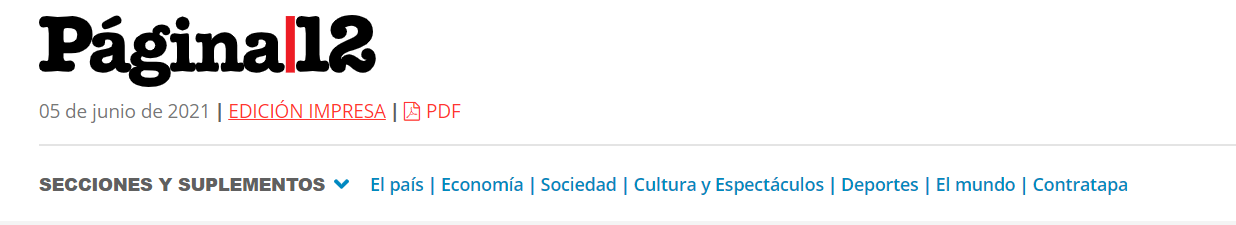

In [35]:
XPATH_TITULO = '//ul[@class = "horizontal-list main-sections hide-on-dropdown"]/li/a/text()'

In [33]:
def obtener_datos(data, url):
    try:
        response = requests.get(url)
        if response.status_code ==200:
            notice = response.content.decode('utf-8')
            parsed = html.fromstring(notice)
            
            try : 
                title = parsed.xpath(data)
                return title
            except IndexError:
                return
        else:
            raise ValueError(f'Error: {response.status_code}')
    except ValueError as ve:
        print(ve)
        

In [36]:
p = obtener_datos(XPATH_TITULO, url)

In [33]:
p

['El país',
 'Economía',
 'Sociedad',
 'Cultura y Espectáculos',
 'Deportes',
 'El mundo',
 'Contratapa']

# Solución de la clase


In [38]:
#Find tira el primero que encuentra.
#s.find('ul')

print(s.find('ul', attrs = {'class':'horizontal-list main-sections hide-on-dropdown'}))

<ul class="horizontal-list main-sections hide-on-dropdown"><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li></ul>


In [13]:
secciones = s.find('ul', attrs = {'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

# Clase 3

In [14]:
seccion = secciones[0]

In [15]:
seccion

<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [16]:
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [17]:
link = seccion.a.get('href')
texto = seccion.a.text

In [18]:
link

'https://www.pagina12.com.ar/secciones/el-pais'

In [19]:
texto

'El país'

In [20]:
links_secciones = [seccion.a.get('href') for seccion  in secciones]

In [21]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [22]:
sec = requests.get(links_secciones[0])

In [23]:
sec.status_code

200

In [24]:
#Todo ok, todo correcto


In [25]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [26]:
#Accediendo en la siguiente página
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo

In [29]:
#Encontrando los titulares en la sección "El país"
featured_article = s_seccion.find('div', attrs = {'class':'article-item__content'})
print(featured_article)


<div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="/346400-un-justiciero">Un justiciero</a></h2><!-- Kicker --></div>


In [30]:
featured_article.a.get('href')

'/346400-un-justiciero'

article_list = s_seccion.find_all(['h4', 'a'] , attrs = {'class': 'is-display-inline title-list'})

In [50]:
type(article_list)

bs4.element.ResultSet

In [45]:
#Otra solución

XPATH_TITLES = '//div[@class = "article-item__content"]/h4/a/@href'
url = links_secciones[0]

pais = obtener_datos(XPATH_TITLES, url)

In [46]:
#Probando accceder  "provincia-de-buenos-aires"
url = url + pais[0]
print(url)

https://www.pagina12.com.ar/secciones/el-pais/346279-que-tendencia-muestran-los-contagios-de-covid-y-que-pasara-c


In [47]:
requests.get(url) 

<Response [404]>

In [128]:
why = 'https://www.pagina12.com.ar/346071-provincia-de-buenos-aires-los-mayores-de-70-anos-pueden-vacu'
print(requests.get(why))

<Response [200]>


# Funciona bien hasta aquí

In [37]:
#Definición de función para obtención de notas

def obtener_notas(soup):
    """
    Función que recibe un objeto de BS de una página de una sección y devuelve una lista de URLS a las notas de esa sección
    """
    lista_notas = []
    
    #Obtengo el ar´tículo promocionado
    featured_article = soup.find_all('div', attrs = {'class':'article-item__content'})
    print(featured_article)
    if featured_article:
        lista_notas.append(featured_article.a.get('href'))
    print("****"*16)
    #Obtengo el listado de articulos
    article_list = soup.find('ul', attrs = {'class':'article-list'})
    for article in article_list.find_all('li'):
        if article.a:
            lista_notas.append(article.a.get('href'))
    return lista_notas
    
    

In [39]:
#ABC
url = "https://www.abc.com.py/"
XPATH_NOTICIAS_ABC = '//div[@class= "article-category"]/a/@href'

In [40]:
abc = requests.get(url)

In [41]:
abc.status_code ==200

True

In [42]:
ABC = obtener_datos(XPATH_NOTICIAS_ABC, url)

In [43]:
ABC

['/internacionales/2021/06/06/unas-3723000-muertes-por-coronavirus-a-nivel-mundial/',
 '/nacionales/2021/06/06/lluvias-persistiran-al-menos-hasta-el-martes/',
 '/nacionales/2021/06/06/asuncion-perdio-sus-emblematicas-plazas-por-inutilidad-de-autoridades/',
 '/nacionales/2021/06/06/mario-abdo-no-decide-aun-si-veta-el-megablindaje-o-viola-la-constitucion/',
 '/este/2021/06/06/vehiculo-conducido-por-un-adolescente-se-incendia-en-plena-marcha/',
 '/nacionales/2021/06/06/matan-a-un-hombre-frente-al-hospital-central-del-ips/',
 '/nacionales/2021/06/06/vehiculo-cae-a-banquina-en-medio-de-la-lluvia-en-luque/',
 '/nacionales/2021/06/06/advierten-de-proyecto-de-ley-que-es-ataque-directo-a-la-propiedad-privada/',
 '/nacionales/2021/06/06/miles-de-muertes-se-pudieron-evitar-con-una-vacunacion-anticovid-oportuna/',
 '/edicion-impresa/suplementos/abc-revista/2021/06/06/adios-al-hule/',
 '/nacionales/2021/06/06/maritodelamuerte-vuelve-a-ser-tendencia-tras-tragico-record-de-muertes/',
 '/nacionales/20

In [44]:
abc = BeautifulSoup(abc.text, 'lxml')

In [153]:
abc

<!DOCTYPE html>
<html lang="es"><head><link as="script" href="/pf/dist/engine/react.js?d=770" rel="preload"/><link as="script" href="/pf/dist/components/combinations/default.js?d=770" rel="preload"/><link as="style" href="/pf/dist/components/combinations/default.css?d=770" rel="preload"/><link crossorigin="anonymous" href="https://fonts.gstatic.com/" rel="dns-prefetch"/><link href="https://www.abc.com.py" rel="dns-prefetch"/><link crossorigin="true" href="https://www.abc.com.py" rel="preconnect"/><link href="https://abccolor-abccolor-prod.cdn.arcpublishing.com/" rel="dns-prefetch"/><link crossorigin="true" href="https://abccolor-abccolor-prod.cdn.arcpublishing.com/" rel="preconnect"/><link href="//www.googletagservices.com/" rel="dns-prefetch"/><link crossorigin="true" href="//www.googletagservices.com/" rel="preconnect"/><link href="https://embi-media.com/" rel="dns-prefetch"/><link crossorigin="true" href="https://embi-media.com/" rel="preconnect"/><link href="//events.browsiprod.com

In [167]:
for a in abc.find_all('a', href=True):
    print ("Found the URL:", a['href'])

Found the URL: /
Found the URL: /este
Found the URL: https://www.facebook.com/ABCDigital/
Found the URL: https://twitter.com/ABCDigital
Found the URL: https://www.youtube.com/user/canalabctv
Found the URL: https://www.instagram.com/abcdigital
Found the URL: #
Found the URL: /
Found the URL: /edicion-impresa/
Found the URL: /nacionales/
Found the URL: /deportes/
Found the URL: /espectaculos/
Found the URL: /internacionales/
Found the URL: https://www.abc.com.py/newsletter/
Found the URL: https://ediciones.abc.com.py/?utm_source=header-menu-abc&utm_medium=abc-digital&utm_campaign=campanha-ePaper-2021
Found the URL: /tv/
Found the URL: /730am/
Found the URL: /fm/
Found the URL: #
Found the URL: /nacionales/
Found the URL: #!
Found the URL: /edicion-impresa/
Found the URL: /edicion-impresa/editorial/
Found the URL: /nembeweb/
Found the URL: /edicion-impresa/suplementos/
Found the URL: /edicion-impresa/suplementos/abc-revista/
Found the URL: /edicion-impresa/suplementos/economico/
Found the

In [173]:
#abc.find_all('div', attrs={'class': 'article-info'})

In [179]:
#for a in titulares.find_all('a', href = True):
 #   print('Titular URL: ', a['href'])
url_mala ='hhtps://pagina12.com.ar'

In [181]:
##Ejemplo try-except 1
try:
    requests.get(url_mala)
except Exception as e:
    print('Error en la request')
    print(e)
    print('\n')

Error en la request
No connection adapters were found for 'hhtps://pagina12.com.ar'




In [100]:
url_nota = links_secciones[0]
#print(url_nota)
conexion = requests.get(url_nota)
notas_principales = BeautifulSoup(conexion.content, 'html.parser')
#print(notas_principales)
print(notas_principales.find('div', class_= 'article-item__content').a['href'])
url_nota = url +notas_principales.find('div', class_= 'article-item__content').a['href']

/346400-un-justiciero


In [120]:
#url_nota = url + notas_principales.find('div', class_= 'article-item__content').a['href']
#print(url_nota)
try:
    nota = requests.get(url_nota)
    if nota.status_code ==200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
       # print(s_nota)
        #Extraemos el título
        titulo = s_nota.find('div', attrs = {'class':'col 2-col'}).h1.text
        #Extraemos la fecha
        print(titulo)
        fecha = s_nota.find('div', attrs = {'class':'date'}).find('span', attrs = {'class':'p12-separator--right--gray'}).text 
        print(fecha)
        autor = s_nota.find('div', attrs = {'class': 'author-name'}).text
        print(autor.replace('Por ', ''))
        #copete=s_nota.find('div',attrs={'class':'col 2-col'}).find('h3').get_text()
        #print(copete)
        
except Exception as e:
    print('Error: ')
    print(e)
    print('\n')

Un justiciero
06 de junio de 2021
Nora Veiras



# De la clase
try:
  nota=requests.get(url_nota)
  if nota.status_code==200:
    s_nota=BeautifulSoup(nota.text,'lxml')
    #Title extraction
    title=s_nota.find('div',attrs={'class':'col 2-col'}).find('h1').get_text()
    print(title)
    #date extraction
    date=s_nota.find('span',attrs={'pubdate':'pubdate'}).get('datetime')
    print(date)
    #copete extraction
    copete=s_nota.find('div',attrs={'class':'col 2-col'}).find('h3').get_text()
    print(copete)
    #volanta extraction
    volanta =s_nota.find('div',attrs={'class':'col 2-col'}).find('h4').get_text()
    print(volanta)
    #body extraction
    body=[content.get_text() 
          for content in 
          s_nota.find('div',attrs={'class':'article-main-content article-text '}).find_all('p')]
    body=' '.join(body)
    print(body)
    #author extraction
    author=s_nota.find('div',attrs={'class':'author-name'}).get_text()
    print(author)
except Exception as e:
  print('Error: ')
  print(e)
  print('\n') 

# Clase 6

In [154]:
imagen = s_nota.find('div', class_ ='image-wrapper').img.get('data-src')

In [155]:
print(imagen)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-06/168001-whatsapp-20image-202021-06-05-20at-2010-00-25-20pm-20-281-29.jpeg?itok=uuUPpPkH


In [156]:
img_req = requests.get(imagen)

img_req.status_code

In [160]:
#Para visualizar la imagen
from IPython.display import Image

In [161]:
img_req.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x006\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x01\x03\x04\x05\x06\x07\x08\x01\x00\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x08\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf9j\x93\x86{\x00\x9ah\x89\xcd\x80\xd2\x8a!\x91\x8cdN@\xccb\